## 딥러닝 모델링 과정
1. 데이터 준비  
2. 모델 설정(구성/설계)   
3. 모델 컴파일   
4. 모델 학습  
5. 모델 평가  

In [1]:
###########################################################

### 1. 데이터 준비
- 학습용/테스트용 데이터 세트 준비

### 2. 모델 설정 (구성/설계)
- 신경망 프레임 생성   
  - **model = Sequential()**   : Sequential : 신경망 프레임 모듈
- 신경망에 층 추가   
  - **model.add(Dense(8, input_dim=4, activation='sigmoid'))**  
    - Dense(units, input_dim, activation)  
    - Dense(출력값수, 입력값수, 활성화 함수)  
    - Dense 클래스는 뉴런의 입력과 출력을 연결해 주는 역할  
      - 입력 뉴런이 4, 출력 뉴런이 8이면 총 연결선은 4x8=32  
      - 각 연결선은 가중치 포함  
      - 가중치가 높을수록 입력값이 출력값에 미치는 영향이 커지고, 낮을수록 영향이 작아짐   
    - 활성화 함수
      - 은닉층에서 찾아낸 선형함수를 비틀어서 비선형으로 구성하는 함수
          - 선형함수를 계속 추가하면 상수인 가중치만 커지지 층으로서의 역할이 불가능해짐
          - 첫번째 층에서 a*3+2 = b를 >> 두번째 층
          - 두번째 층에서 b*5-3 = c의 함수식을 연산
              - 두번째 층 b에 첫번재 층 함수식 (a*3+2)*5-3 =c 에서의 b 특성은 사라지고 a만 남게 됨
              - b를 비선형으로 변황해서 남겨두겠다 >> 활성화 함수 log(b) >> 두번째 층은 k를 입력 받아서 k*5-3 = c연산을 진행
- 
  - linear : 입력과 동일한 값을 출력  
  - sigmoid : 시그모이드 함수로 이진분류에서 출력층에 주로 사용
  - softmax : 소프트맥스 함수로 다중클래스 분류문제에서 출력층에 주로 사용
  - relu: Rectified Linear Unit 함수를 사용하여 출력값을 0 이상의 값으로 변환.
    - 은닉층에서 주로 사용  
  - tanh : 하이퍼볼릭 탄젠트 함수 사용. 출력값을 -1과 1 사이의 값으로 변환. 
    - 은닉층에서 많이 사용 

### 3. 모델 컴파일
- **model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])**
- 앞에서 설정한 모델이 효과적으로 구현될 수 있도록  >> 최적의 학습을 위한 설정
- 여러 가지 환경을 설정하면서 실행 가능한 상태가 되도록 만들어주는 단계  
- 어떤 오차 함수를 사용할지 : loss  
- 어떤 최적화 방법을 사용할지 : optimizer(최소 손실값을 찾도록 최적화시키는 함수)  
- 수행 결과 평가는 어떤 방법을 사용할지 : metrics : accuracy  
  

### 4. 모델 학습 (모델 실행)
- **model.fit(X_train, y_train, epochs=100, batch_size=10)**  
- epoch : 에포크  
    - 학습 프로세스가 모든 샘플에 대해 한 번 실행하는 것  
    - epoch= 100 : 각 샘플이 처음부터 끝까지 100번 재사용될 때까지 반복한다는 의미  
- batch_size = 10 : 샘플을 한 번에 몇 개씩 처리할 것인지 설정  
    - 전체 ~개의 샘플을 10개씩 끊어서 집어 넣으라는 의미  
    - 배치 사이즈가 너무 크면 학습 속도가 느려지고,   
    - 너무 작으면 각 실행 값의 편차가 생겨서 전체 결과값이 불안정해질 수 있음  
    - 사용하는 메모리가 감당할 만큼의 배치 사이즈로 설정  

### 5. 모델 평가 
- **model.evaluate(X_test, y_test)**   
- 출력 : - loss: 0.4886 - accuracy: 0.8176  

In [1]:
###############################################################

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import numpy as np

### 딥러닝 모델링 예제

#### 1. 데이터 준비
-  AND 논리 data

In [4]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential # Sequential : 신경망 프레임 모듈
from keras.layers import Dense # Dense : 신경망 층을 정의하는 모듈

tf.__version__

'2.18.0'

In [5]:
X_train = np.array([[0,0],[0,1],[1,0],[1,1]], dtype='float32')
y_train = np.array([0,0,0,1], dtype='float32').reshape((-1, 1))
X_test = np.array([[0,1],[1,1],[1,0],[0,0],[1,1]], dtype='float32')
y_test = np.array([0,1,0,0,1], dtype='float32').reshape((-1, 1))

#### 2. 모델 설정(구성/설계) 
- 1개의 층을 포함하는 모델 구성 

### tensorflow 설치
- 아나콘다 프롬프트에서 진행
- conda activate DLEnv
- pip install tensorflow

In [6]:
# 신경망 프레임 생성
and_model = Sequential()

# 층 추가
and_model.add(Dense(units=1, input_dim=2, activation="sigmoid"))

C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 3. 모델 컴파일 

In [7]:
and_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#### 4. 모델 학습

In [8]:
# 모델을 컴파일한 이후에 진행 
and_model.fit(x=X_train, y=y_train, epochs=100, batch_size=4)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.7500 - loss: 0.7951
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7500 - loss: 0.7947
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.7944
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.7941
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7500 - loss: 0.7937
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.7934
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7500 - loss: 0.7931
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7500 - loss: 0.7928
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7500 - loss: 0.7924
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7500 - loss: 0.7921
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7500 - loss: 0.7918
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7500 - l

#### 5. 모델 평가 

In [9]:
print("score : ", and_model.evaluate(X_test, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.6000 - loss: 0.9333
score :  [0.9333284497261047, 0.6000000238418579]


In [10]:
# 가중치 확인
and_model.weights

[<Variable path=sequential/dense/kernel, shape=(2, 1), dtype=float32, value=[[-0.3820312]
  [-0.9122028]]>,
 <Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[-0.09950394]>]

In [11]:
# 가중치 절편 확인 함수
and_model.get_weights()

[array([[-0.3820312],
        [-0.9122028]], dtype=float32),
 array([-0.09950394], dtype=float32)]

In [12]:
weights, biases = and_model.get_weights()
weights, biases

(array([[-0.3820312],
        [-0.9122028]], dtype=float32),
 array([-0.09950394], dtype=float32))

In [13]:
# 딥러닝 모델의 구성 확인
and_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

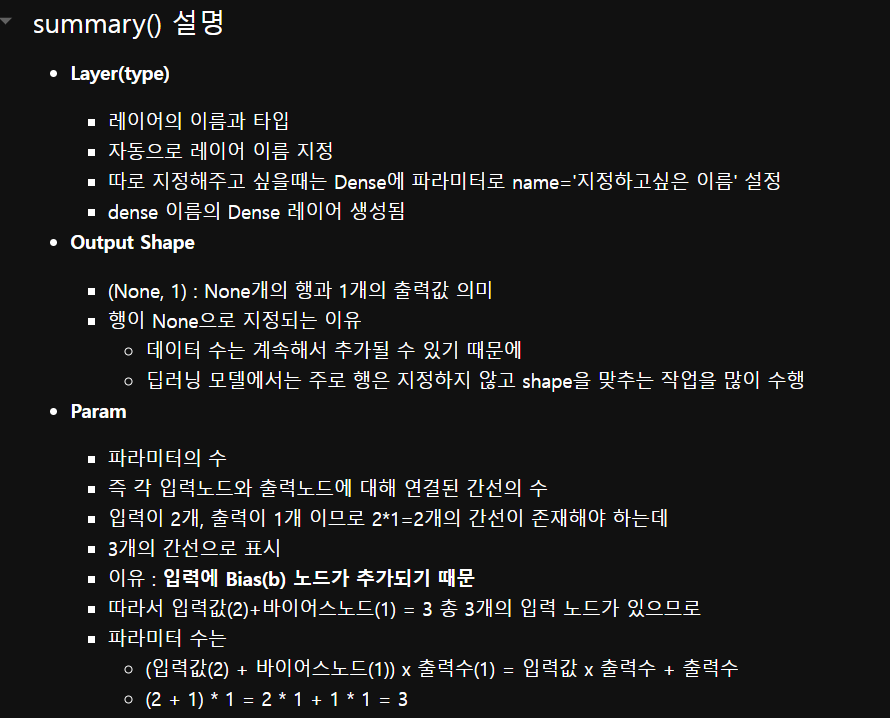

In [14]:
############################################################################

### Dense 층 추가 : 2개 층 모델

In [15]:
# 1. 데이터 준비
X_train = np.array([[0,0],[0,1],[1,0],[1,1]], dtype='float32')
y_train = np.array([0,0,0,1], dtype='float32').reshape((-1, 1))
X_test = np.array([[0,1],[1,1],[1,0],[0,0],[1,1]], dtype='float32')
y_test = np.array([0,1,0,0,1], dtype='float32').reshape((-1, 1))

In [18]:
and_model = Sequential()

# 첫번째 층 추가
and_model.add(Dense(units=1, input_shape=(2,), activation="sigmoid"))

# 두번째 층 추가(마지막 층 : 출력층 >> input_dim 파라미터를 설정하지 않음
and_model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
and_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
and_model.fit(x=X_train, y=y_train, epochs=1000, batch_size=4)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step - accuracy: 0.7500 - loss: 0.6620
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.6616
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 0.6613
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7500 - loss: 0.6609
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7500 - loss: 0.6606
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 0.6602
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.6599
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7500 - loss: 0.6595
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7500 - loss: 0.6592
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7500 - loss: 0.6588
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7500 - loss: 0.6585
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy

In [20]:
# 5. 평가
print("score :", and_model.evaluate(X_test, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6000 - loss: 0.6121
score : [0.612099289894104, 0.6000000238418579]


In [21]:
# 가중치와 바이어스 확인
and_model.weights

[<Variable path=sequential_2/dense_3/kernel, shape=(2, 1), dtype=float32, value=[[-1.4484328]
  [-1.545145 ]]>,
 <Variable path=sequential_2/dense_3/bias, shape=(1,), dtype=float32, value=[1.0963185]>,
 <Variable path=sequential_2/dense_4/kernel, shape=(1, 1), dtype=float32, value=[[-1.1493098]]>,
 <Variable path=sequential_2/dense_4/bias, shape=(1,), dtype=float32, value=[-0.5750918]>]

In [24]:
and_model.get_weights()

# # 첫층에서 2개입력받아서 
# # 2개의 가중치와
# [array([[-1.4484328],
#         [-1.545145 ]], dtype=float32),
#  # 1개의 절편
#  array([1.0963185], dtype=float32),

#  # 두번째 층에서는 1개의 가중치와
#  array([[-1.1493098]], dtype=float32),
#  # 1개의 절편
#  array([-0.5750918], dtype=float32)]

[array([[-1.4484328],
        [-1.545145 ]], dtype=float32),
 array([1.0963185], dtype=float32),
 array([[-1.1493098]], dtype=float32),
 array([-0.5750918], dtype=float32)]

In [25]:
and_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12 (52.00 B)

### 입력수, 출력수에 따른 파라미터 계산 

In [26]:
model2 = Sequential()
model2.add(Dense(units=5, input_shape=(1,), activation='sigmoid')) # 입력층 포함 Dense, 입력 특성 1
model2.add(Dense(units=3, activation='sigmoid')) # 중간층(은닉층)
model2.add(Dense(units=1, activation='sigmoid')) # 최종  출력층을 포함하는 Dense 객체, 이진분류 최종 출력 unit = 1
model2.summary()
# 첫번째 층 : 입력 1개 >> 출력 5개 : (1개 가중치+1개 절편) * 5 = 5+5 = 10
# 두번째 층 : 입력 5개 >> 출력 3개 : (5개 가중치+1개 절편) * 3 = 15+3 = 18
# 첫번째 층 : 입력 1개 >> 출력 5개 : (3개 가중치+1개 절편) * 1 = 3+1 = 4


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 5)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
###############################################################

### 연습문제
- OR 논리의 신경망 모델 생성 
- AND 모델 기준으로 데이터 준비해서 모델링 수행 

In [59]:
# 1. 데이터 준비
X_train = [[0,0],[0,1],[1,0],[1,1]]
y_train = [0,1,1,1]
X_test = [[0,1],[1,1],[1,0],[0,0],[1,1]]
y_test = [1,1,1,0,1]

In [72]:
X_train = np.array(X_train, dtype="float32")
y_train = np.array(y_train, dtype="float32").reshape(-1,1)
X_test = np.array(X_test, dtype="float32")
y_test = np.array(y_test, dtype="float32").reshape(-1,1)

In [75]:
# 2개 층을 갖는 모델 생성
# 중간층 unit은 임의로 설정해서 모델 객체 구성
or_model = Sequential()

or_model.add(Dense(units=4, input_shape=(2,), activation="sigmoid"))
or_model.add(Dense(units=1, activation="sigmoid"))

In [76]:
or_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
or_model.fit(x=X_train, y=y_train, epochs=100, batch_size=1, verbose=1) # verbose는 학습하는 과정을 보여줄건지 말건지, default=True로 돼있음

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2667 - loss: 0.9302      
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4667 - loss: 0.8372 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1667 - loss: 1.0365     
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4667 - loss: 0.8268 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1000 - loss: 1.0510     
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4667 - loss: 0.8097 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1000 - loss: 1.0072     
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4667 - loss: 0.8157 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1667 - loss: 0.9876     
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4667 - loss: 0.8130 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2667 - loss: 0.9169     
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

In [77]:
# 모델 평가
print("score :", or_model.evaluate(X_test, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8000 - loss: 0.6747
score : [0.6746826171875, 0.800000011920929]


In [50]:
# 가중치, 바이어스 확인
or_model.weights

[<Variable path=sequential_11/dense_20/kernel, shape=(2, 2), dtype=float32, value=[[ 0.7788314  -0.6334392 ]
  [ 1.2929167  -0.66250014]]>,
 <Variable path=sequential_11/dense_20/bias, shape=(2,), dtype=float32, value=[ 0.31567547 -0.36615074]>,
 <Variable path=sequential_11/dense_21/kernel, shape=(2, 1), dtype=float32, value=[[ 1.1134486]
  [-0.8985535]]>,
 <Variable path=sequential_11/dense_21/bias, shape=(1,), dtype=float32, value=[0.53108513]>]

In [52]:
and_model.get_weights()

# # 첫층에서 2개입력받아서 
# # 2개의 가중치와
# [array([[-1.4484328],
#         [-1.545145 ]], dtype=float32),
 #  # 1개의 절편
 # array([1.0963185], dtype=float32),

#  array([1.0963185], dtype=float32),

#  # 두번째 층에서는 1개의 가중치와
 # array([[-1.1493098]], dtype=float32),
#  # 1개의 절편
 # array([-0.5750918], dtype=float32)]

[array([[-1.4484328],
        [-1.545145 ]], dtype=float32),
 array([1.0963185], dtype=float32),
 array([[-1.1493098]], dtype=float32),
 array([-0.5750918], dtype=float32)]

In [78]:
# model 모델의 summary 확인
or_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53 (216.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36 (148.00 B)

NameError: name 'or_model' is not defined